<h1><center> Intro Seismology: Lab 1

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import io
from IPython.core.display import display, HTML
import scipy.stats as stats
import seaborn as sns
#sns.set(color_codes=True)
#plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

In [2]:
HTML('''
<script>
    var code_show=true; //true -> hide code at first

    function code_toggle() {
        $('div.prompt').hide(); // always hide prompt

        if (code_show){
            $('div.input').hide();
        } else {
            $('div.input').show();
        }
        code_show = !code_show
    }
    $( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">[Toggle Code]</a>
''')

In [24]:
data = pd.read_csv("lab01_data.csv")

lat = np.array(data['latitude'])
lon = np.array(data['longitude'])
depth = np.array(data['depth'])
Mw = np.array(data['mag'])

<h3>1. Longitude and Latitude of study region</h3>  
  
Longitude = [-123.596, -114.675]  
Latitude = [32.291, 39.048]

<h3>5. I get 550 earthquakes with $M_w \ge 4$ </h3>

<h3>6. Distribution of earthquakes </h3>
  

These earthquakes are distributed along the major San Andreas Fault (shown in red line in the figure). There are some earthquakes  along the off fault branches. A very small number of earthquakes are spread out even further.

<h3>8 and 9. Earthquake locations plot with Magnitude proportional to size of earthquake</h3>

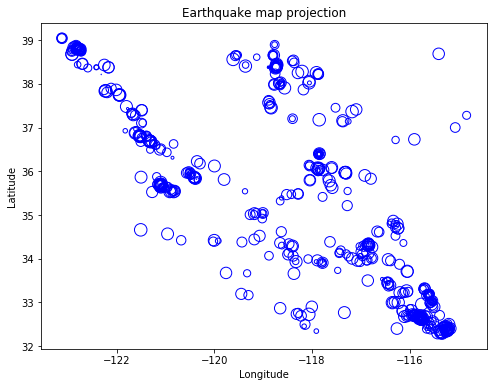

In [29]:
# plot figure
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111)

size = abs(Mw - np.max(Mw))**4

ax.scatter(lon,lat, facecolors = 'none', edgecolors = 'b', s = size*4)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Earthquake map projection')

plt.show()

<h3> 10. Depth of earthquakes vs longitude

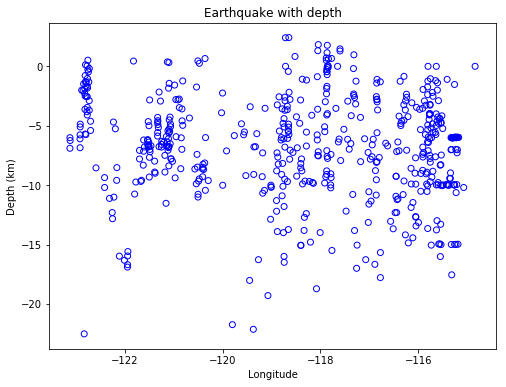

In [30]:
# plot figure
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111)

ax.scatter(lon, depth*-1, facecolors = 'none', edgecolors = 'b')

ax.set_xlabel('Longitude')
ax.set_ylabel('Depth (km)')
ax.set_title('Earthquake with depth')

plt.show()

In the given region, most of the earthquakes are concentrated around the depths of 3 to 12 kms. They are also concentrated along certain longitude ranges, and not so much in other ranges.

<h3>11. Magnitude vs. Log(Frequency) distribution

In [19]:
sorted_Mw = np.sort(Mw)
#for i in range(len(Mw)):
N = np.zeros(6) 
for i in range(len(N)):
    N[i] = sum(Mw>=4+(i/2))
    
mag = np.linspace(4,6.5,6)

slope, intercept, r_value, p_value, std_err = stats.linregress(mag, np.log10(N))

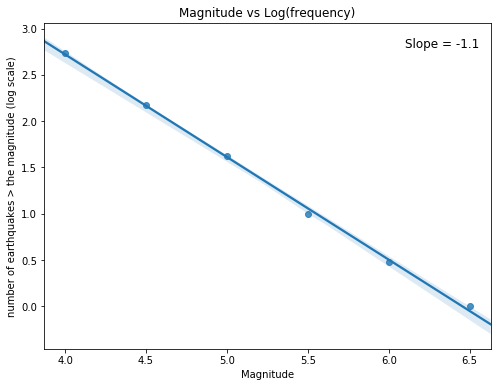

In [33]:
# plot figure
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111)

#ax.scatter(mag, np.log10(N), facecolors = 'none', edgecolors = 'b', s = Mw*5)
#ax.plot(slope*mag + intercept, mag)
sns.regplot(mag, np.log10(N))
ax.set_xlabel('Magnitude')
ax.set_ylabel('number of earthquakes > the magnitude (log scale)')
ax.set_title('Magnitude vs Log(frequency)')
ax.text(6.1, 2.8, r'Slope = -1.1', fontsize=12)
plt.show()

We can see that the the trend is fairly linear with a slope of -1.1.